# Working with filter transmissions.

This tutorial demonstrates how to read and write broadband filter transmissions used with Galacticus. Note that this tutorial does not include examples of top-hat filters -- they are demonstrated in a separate tutorial. For this tutorial you will need to have the Galacticus datasets repository downloaded.

Filter transmission files are stored in the static/filters and dynamic/filters subdirectories of the Galacticus datasets repository. For this python package to locate the datasets repository, you will need to have set an environment variable GALACTICUS_DATASETS with the path to the datasets repository.

In [1]:
# We'll be doing some plotting in this tutorial so we will begin by loading the appropriate plotting utilities.
from galacticus.plotting.utils import *
%matplotlib inline

/Users/amerson/anaconda/lib/python2.7/site-packages/galacticus-0.1-py2.7.egg/galacticus/__init__.py:18: UserWarning: WARNING! No path specified for Galacticus source code.
Specify the path in your environment variables using the variable name 'GALACTICUS_ROOT'.
  warnings.warn(warningString)


Reading and writing of filters is handled using the **`GalacticusFilter`** class. 

In [2]:
# Load class for working with filters used by Galacticus.
from galacticus.filters.filters import GalacticusFilter

In [3]:
# Initialize an instance of the class.
GF = GalacticusFilter()

In [4]:
# For information, print out docstring for the class.
print(GF.__doc__)


    GalacticusFilter: Class to manage reading and writing of filter transmissions used 
                      with Galacticus.

    USAGE: GalFilter = GalacticusFilter([path=None],[vbandFilterName=Buser_V],                                        [spectrumFile=A0V_Castelli.xml],[verbose=False])

        INTPUT 
                    path     -- Path to datasets repository. If None, will search for path in 
                                environment variables (stored as 'GALACTICUS_DATASETS'). 
                                [Default=None] 
             vbandFilterName -- Name of file containing V-band transmission curve. It is 
                                assumed that this file is either in the dynamic or static
                                subdirectories of the datasets repository. If not file name
                                is specified the class will assume that the transmission
                                is the V-band filter 'Buser_V'. [Default=Buser_V]
           

The functions **`create`** and **`load`** will each return an instance of the **`Filter`** class, which is used to store the filter transmission curve information.

In [5]:
# As an example, let's load the SDSS r-band filter and print out the attributes of the Filter instance that 
# is returned.
filterName = "SDSS_r"
F = GF.load(filterName)
# Print all the attributes associated with this filter
for key in F.__dict__.keys():
    print(key+" = "+str(F.__dict__[key]))

origin = Michael Blanton
effectiveWavelength = 6198.41999837
description = SDSS r vacuum (filter+CCD +0 air mass)
transmission = [(5230.0, 0.0) (5280.0, 0.0023950001) (5330.0, 0.001572) (5380.0, 0.002319)
 (5430.0, 0.01798) (5480.0, 0.091109999) (5530.0, 0.2195) (5580.0, 0.3905)
 (5630.0, 0.5596) (5680.0, 0.6844) (5730.0, 0.7666) (5780.0, 0.8189)
 (5830.0, 0.8519) (5880.0, 0.8748) (5930.0, 0.8931) (5980.0, 0.9103)
 (6030.0, 0.9233) (6080.0, 0.9295) (6130.0, 0.9354) (6180.0, 0.9468)
 (6230.0, 0.9624) (6280.0, 0.9785) (6330.0, 0.9917) (6380.0, 1.0)
 (6430.0, 1.007) (6480.0, 1.014) (6530.0, 1.018) (6580.0, 1.015)
 (6630.0, 0.993) (6680.0, 0.8596) (6730.0, 0.6314) (6780.0, 0.3673)
 (6830.0, 0.1517) (6880.0, 0.050560001) (6930.0, 0.02311) (6980.0, 0.01235)
 (7030.0, 0.00606) (7080.0, 0.0033730001) (7130.0, 0.002264)
 (7180.0, 0.00097719999) (7230.0, 0.0)]
url = None
vegaOffset = -0.139298272021
file = /Users/amerson/codes/Galacticus/datasets/static/filters/SDSS_r.xml
name = SDSS r


In [6]:
# These attributes are now avaialbe to extract. For example:
print(F.effectiveWavelength)
print(F.vegaOffset)

6198.41999837
-0.139298272021


In [7]:
# The transmission can be extracted as a numpy array:
data = F.transmission
print(type(data))
print(data.dtype.names)
print(data.wavelength[:10])
print(data.transmission[:10])

<class 'numpy.recarray'>
('wavelength', 'transmission')
[ 5230.  5280.  5330.  5380.  5430.  5480.  5530.  5580.  5630.  5680.]
[ 0.        0.002395  0.001572  0.002319  0.01798   0.09111   0.2195
  0.3905    0.5596    0.6844  ]


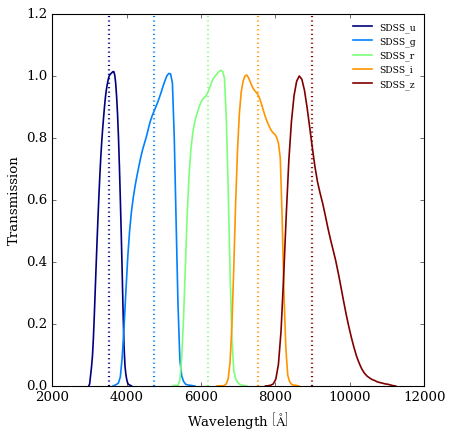

In [8]:
# Example: plot the SDSS filter transmission curves, indicating their effective wavelengths.
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111)
filters = ["SDSS_u","SDSS_g","SDSS_r","SDSS_i","SDSS_z"]
carr = colour_array(len(filters),cmap='jet')
for i,filterName in enumerate(filters):
    F = GF.load(filterName)
    ax.plot(F.transmission.wavelength,F.transmission.transmission,c=carr[i],lw=1.5,label=filterName)
    ax.axvline(F.effectiveWavelength,ls=':',lw=2.0,c=carr[i])
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("Transmission")
ax.legend(loc=0)
show()

Now, let's have a go at creating a filter. We will create an example filter with a Gaussian transmission curve.

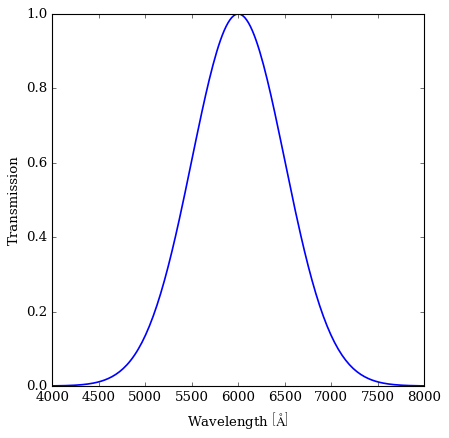

In [9]:
# Build a filter with a Gaussian profile centered on wavelength 6000A. Print the filter to check.
from scipy.stats import norm
GAUSS = norm(loc=6000.0,scale=500.0)
wave = np.linspace(4000,8000,200)
trans = GAUSS.pdf(wave)
trans /= trans.max()
# Plot the Gaussian to see what it looks like...
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(wave,trans,lw=1.5)
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("Transmission")
show()

Now, we can create this filter and write it to file. Note that all user-created filters are written to the *dyanmic/filters* subdirectory of the Galacticus datasets repository.

In [14]:
# Write this filter transmission to a file. 
response = np.zeros(len(wave),dtype=[("wavelength",float),("response",float)])
response["wavelength"] = wave
response["response"] = trans
description = "A Gaussian transmission curve centered on 6000A with width 500A."
origin = "exampleFiltersTutorial"
url = "None"
FILTER = GF.create("gaussian6000",response,description=description,origin=origin,url=url)

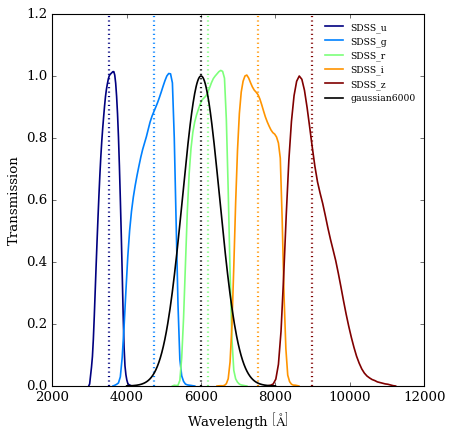

In [13]:
# Now we can read in the filter we just created and plot it alongside the SDSS filters.
fig = figure(figsize=(6,6))
ax = fig.add_subplot(111)
filters = ["SDSS_u","SDSS_g","SDSS_r","SDSS_i","SDSS_z"]
carr = colour_array(len(filters),cmap='jet')
for i,filterName in enumerate(filters):
    F = GF.load(filterName)
    ax.plot(F.transmission.wavelength,F.transmission.transmission,c=carr[i],lw=1.5,label=filterName)
    ax.axvline(F.effectiveWavelength,ls=':',lw=2.0,c=carr[i])
F = GF.load("gaussian6000") # *** Note that we specified the path to the location of the filter file.
ax.plot(F.transmission.wavelength,F.transmission.transmission,c='k',lw=1.5,label="gaussian6000")
ax.axvline(F.effectiveWavelength,ls=':',lw=2.0,c='k')
ax.set_xlabel("Wavelength $\left[{\\rm \AA}\\right ]$")
ax.set_ylabel("Transmission")
Legend(ax,loc=0)
show()